In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
import seaborn as sns
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [2]:
#import csv file
EC = pd.read_csv("employee_combine.csv")

In [3]:
#data obersvations
EC.head(20)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition_Status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No
5,2006,0.36,0.95,3,206,4,0,0,sales,low,No
6,2007,0.54,0.37,2,176,2,0,0,sales,low,No
7,2008,0.99,0.91,5,136,4,0,0,sales,low,No
8,2009,0.50,0.75,6,127,3,0,0,sales,low,No
9,2010,0.74,0.64,4,268,3,0,0,sales,low,No


In [4]:
EC.shape

(14999, 11)

In [5]:
EC.dept.values

array(['sales', 'sales', 'sales', ..., 'support', 'support', 'support'],
      dtype=object)

In [6]:
EC.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
Attrition_Status          object
dtype: object

In [7]:
EC.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Attrition_Status         0
dtype: int64

In [8]:
EC.isna().values.any()

False

In [9]:
EC_dept = EC.groupby('dept', axis=0).sum()
EC_dept

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
dept,,,,,,,,
IT,9394950,758.46,879.55,4683,248119,4256,164,3
RandD,5334559,487.80,560.44,3033,158030,2650,134,27
accounting,5565379,446.51,550.49,2934,154292,2702,96,14
hr,5200261,442.52,523.84,2701,146828,2480,89,15
management,5946799,391.45,456.12,2432,126787,2711,103,69
marketing,6650945,530.76,614.23,3164,171073,3063,138,43
product_mng,7302969,558.91,644.71,3434,180369,3135,132,0
sales,31782256,2543.81,2938.23,15634,831773,14631,587,100
support,16077353,1378.19,1611.81,8479,447490,7563,345,20


In [10]:
EC.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
EC["Attrition_Status"].value_counts()

No     11428
yes     3571
Name: Attrition_Status, dtype: int64

In [12]:
EC.isnull().values.any()

False

In [13]:
#PREDICTIONS AND ACCURACY DONE BY DECCISIONTREEREGRESSOR, LOGICALREGRESSOR AND METRIC LOSS

In [14]:
#to analyse the data we have to convert to numerical values so the system can understand
#converting strings to numerical values
##creating labelEncoder
le = preprocessing.LabelEncoder
# Converting string labels into numbers.
EC.dept = LabelEncoder().fit_transform(EC.dept)
EC.salary = LabelEncoder().fit_transform(EC.salary)
EC.Attrition_Status = LabelEncoder().fit_transform(EC.Attrition_Status)



In [15]:
EC.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                       int64
salary                     int64
Attrition_Status           int64
dtype: object

In [16]:
EC.head(20)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition_Status
0,2001,0.58,0.74,4,215,3,0,0,7,1,0
1,2002,0.82,0.67,2,202,3,0,0,7,1,0
2,2003,0.45,0.69,5,193,3,0,0,7,1,0
3,2004,0.78,0.82,5,247,3,0,0,7,1,0
4,2005,0.49,0.60,3,214,2,0,0,7,1,0
5,2006,0.36,0.95,3,206,4,0,0,7,1,0
6,2007,0.54,0.37,2,176,2,0,0,7,1,0
7,2008,0.99,0.91,5,136,4,0,0,7,1,0
8,2009,0.50,0.75,6,127,3,0,0,7,1,0
9,2010,0.74,0.64,4,268,3,0,0,7,1,0


In [17]:
#attrition by salary
EC_salary = EC.groupby('salary', axis=0).sum()
EC_salary.head()
# 0 = low, 1 = medium, 2 = high

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Attrition_Status
salary,,,,,,,,,,
0,10666524,788.55,871.25,4660,247236,4568,192,72,6862,82
1,53610899,4395.11,5245.70,27800,1470491,25154,1040,66,43730,2172
2,48215077,4008.23,4623.86,24582,1297827,22748,937,181,37460,1317


In [18]:
EC.salary.value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

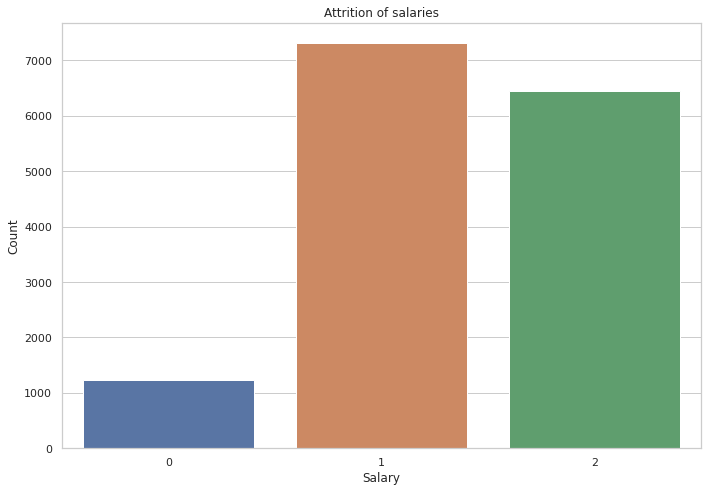

In [19]:
#visualization of attrition by salary
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.countplot(EC["salary"])
plt.title('Attrition of salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("salary.png")



In [20]:
# attrition by promotion in last 5 years
EC['promotion_last_5years'] = EC.promotion_last_5years.replace(to_replace = 0,value = "No promotion") 
EC['promotion_last_5years'] = EC.promotion_last_5years.replace(to_replace = 1,value = "promotion") 
EC_promotion = EC.groupby('promotion_last_5years', axis=0).sum()
EC_promotion.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,dept,salary,Attrition_Status
promotion_last_5years,,,,,,,,,,
No promotion,109266144,8982.62,10515.59,55845,2951802,51141,2093,86349,19780,3552
promotion,3226356,209.27,225.22,1197,63752,1329,76,1703,428,19


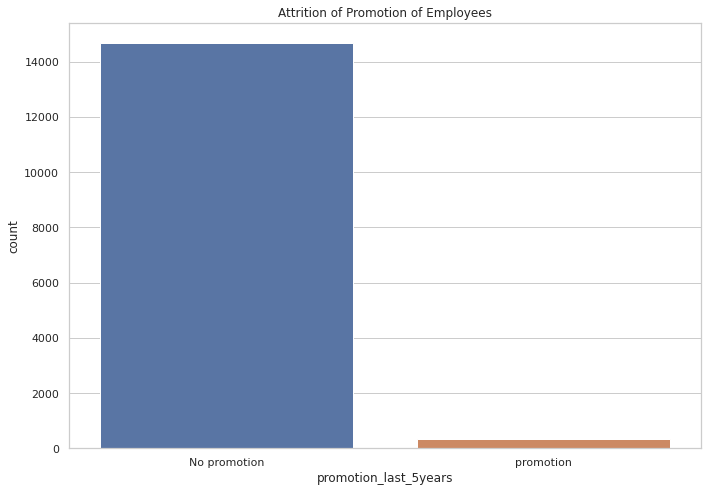

In [21]:
#visualization of attrition by Promotion in last 5 years
plt.figure(figsize=(10,7))
plt.title("Attrition of Promotion of Employees")
plt.xlabel("Promotion")
plt.ylabel("Count")
sns.set(style="whitegrid")
sns.countplot(EC["promotion_last_5years"])
plt.tight_layout()
plt.savefig("promotion.png")


In [22]:
# attrition by Work accident
EC['Work_accident'] = EC.Work_accident.replace(to_replace = 0,value = "no_accident") 
EC['Work_accident'] = EC.Work_accident.replace(to_replace = 1,value = "accident") 
EC_work_accident = EC.groupby('Work_accident', axis=0).sum()
EC_work_accident.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,dept,salary,Attrition_Status
Work_accident,,,,,,,,,
accident,16631373,1406.22,1546.81,8218,433406,7604,12785,2914,169
no_accident,95861127,7785.67,9194.00,48824,2582148,44866,75267,17294,3402


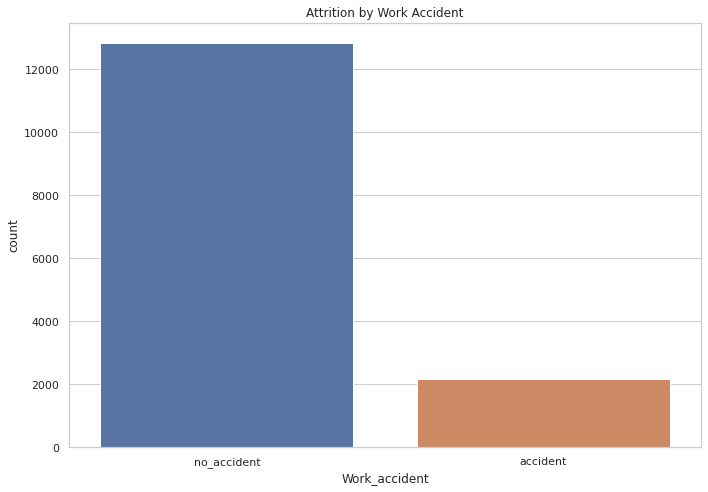

In [23]:
#visualization of attrition by Work accident
plt.figure(figsize=(10,7))
plt.title("Attrition by Work Accident")
plt.xlabel("Work_accident")
plt.ylabel("Count")
sns.set(style="whitegrid")
sns.countplot(EC["Work_accident"])
plt.tight_layout()
plt.savefig("work accident.png")


In [25]:
#attrition by time spent in company
EC_time_spent = EC.groupby('time_spend_company', axis=0).sum()
EC_time_spent

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,dept,salary,Attrition_Status
time_spend_company,,,,,,,,
2,23971671,2261.32,2327.88,11962,649232,19194,4355,53
3,47560392,4035.34,4308.57,21441,1202476,37813,8641,1586
4,18287296,1195.44,1963.59,11833,571375,15008,3468,890
5,9946984,898.98,1198.53,6657,328448,8648,2015,833
6,5570303,433.27,542.00,3025,152253,4295,993,209
7,2399290,119.56,128.36,724,37740,1090,264,0
8,2048265,107.74,115.34,612,31396,822,228,0
10,2708299,140.24,156.54,788,42634,1182,244,0


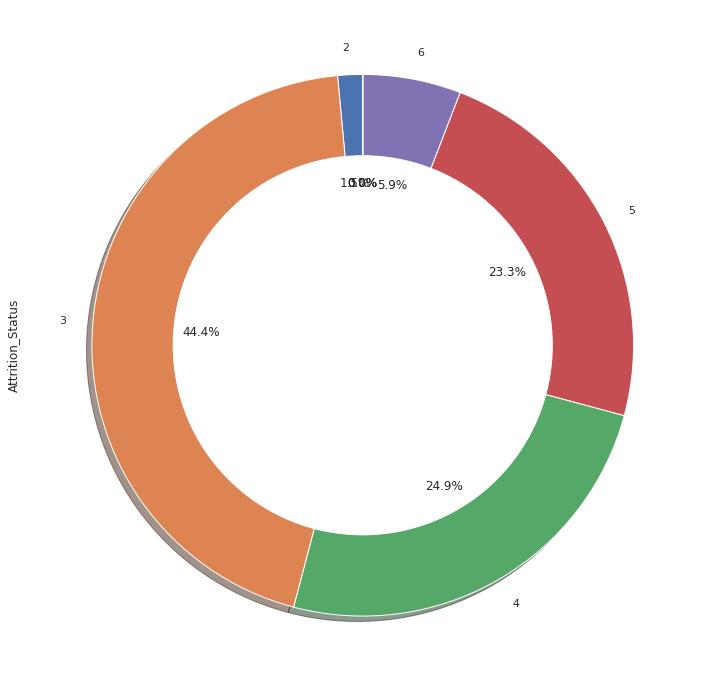

In [26]:
#visualization of attrition by time spent
sns.set(style="whitegrid")
EC_time_spent['Attrition_Status'].plot(kind='pie',
                            figsize=(10, 17),
                            autopct='%1.1f%%', 
                            startangle=90,
                            explode=(0, 0, 0, 0, 0,0,0,0),
                           shadow=True,             
                            )
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig("time spent.png")

In [27]:
#attrition by number of projects
EC_number_project = EC.groupby('number_project', axis=0).sum()
EC_number_project

,Emp ID,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,dept,salary,Attrition_Status
number_project,,,,,,,,
2,16728125,1143.30,1357.59,382898,7595,14194,3152,1567
3,31753858,2788.50,2905.70,800893,13327,23383,5503,72
4,33460255,3034.25,3230.14,895358,15081,25628,5907,409
5,20660664,1874.41,2103.91,585502,10492,16277,3715,612
6,8244801,321.04,923.41,280227,4922,7066,1569,655
7,1644797,30.39,220.06,70676,1053,1504,362,256


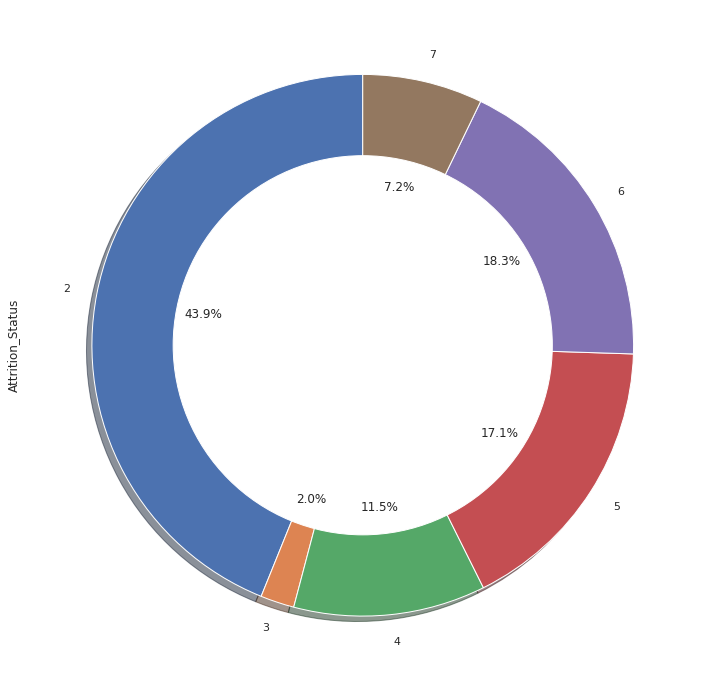

In [28]:
sns.set(style="whitegrid")
EC_number_project['Attrition_Status'].plot(kind='pie',
                            figsize=(10, 17),
                            autopct='%1.1f%%', 
                            startangle=90,
                            explode=(0, 0, 0, 0, 0,0),
                           shadow=True,             
                            )
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig("number of project.png")



In [29]:
#attirition by department
EC_dept = EC.groupby('dept', axis=0).sum()
EC_dept

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary,Attrition_Status
dept,,,,,,,,
0,9394950,758.46,879.55,4683,248119,4256,1679,273
1,5334559,487.80,560.44,3033,158030,2650,1108,121
2,5565379,446.51,550.49,2934,154292,2702,1028,204
3,5200261,442.52,523.84,2701,146828,2480,1053,215
4,5946799,391.45,456.12,2432,126787,2711,630,91
5,6650945,530.76,614.23,3164,171073,3063,1154,203
6,7302969,558.91,644.71,3434,180369,3135,1217,198
7,31782256,2543.81,2938.23,15634,831773,14631,5643,1014
8,16077353,1378.19,1611.81,8479,447490,7563,3030,555


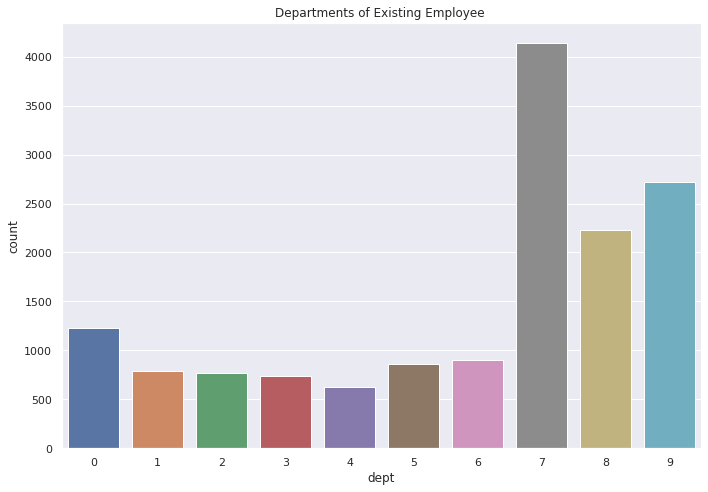

In [30]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(EC['dept'])
plt.title('Departments of Existing Employee ')
plt.tight_layout()
plt.savefig("dept.png")


In [31]:
#attrition by statisfactory level for Non-existing employee
EC_stat = EC[11429:]
El_stat = EC_stat[['satisfaction_level']]
El_stat['satisfaction_level'] = pd.cut(El_stat['satisfaction_level'], 
       3, labels=["small", "medium", "high"])
El_stat.satisfaction_level.value_counts()

/home/venom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


medium    1535
small     1078
high       957
Name: satisfaction_level, dtype: int64

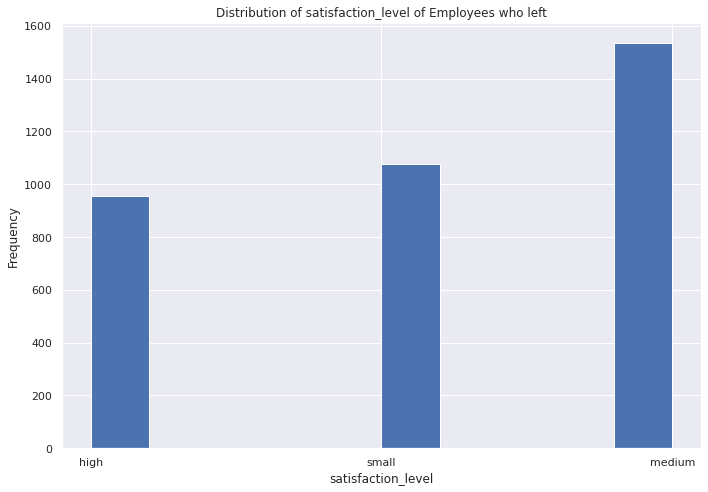

In [32]:
#visulisation for statisfactory level of non - existing employees
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(El_stat['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("stat non.png")

In [33]:
# attirition by statisfactory level for existing employee
EC_stat = EC[:]
Ee_stat = EC_stat[['satisfaction_level']]
Ee_stat['satisfaction_level'] = pd.cut(Ee_stat['satisfaction_level'], 
       3, labels=["small", "medium", "high"])
Ee_stat.satisfaction_level.value_counts()

/home/venom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


high      6503
medium    5581
small     2915
Name: satisfaction_level, dtype: int64

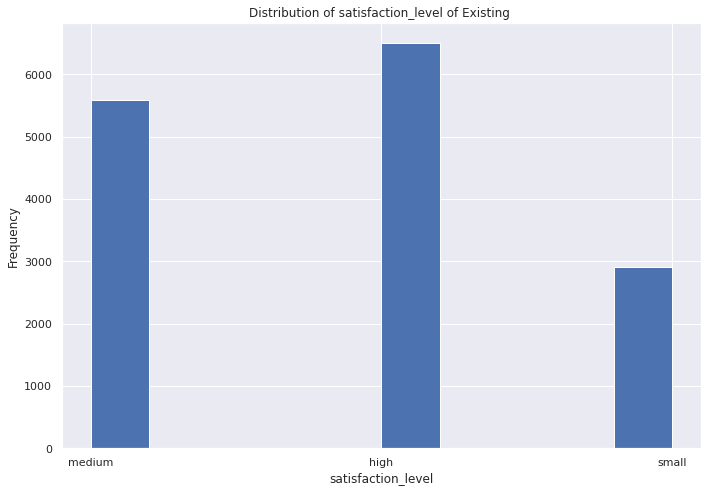

In [34]:
#visulisation for statisfactory level of existing employees
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(Ee_stat['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Existing ')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("stat exi.png")

In [35]:
#hence medium statisfactory level are prone to leave 
#no attrition

In [36]:
#PREDICTIONS

In [37]:
# BUILDING MODELS

In [38]:
EC

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition_Status
0,2001,0.58,0.74,4,215,3,no_accident,No promotion,7,1,0
1,2002,0.82,0.67,2,202,3,no_accident,No promotion,7,1,0
2,2003,0.45,0.69,5,193,3,no_accident,No promotion,7,1,0
3,2004,0.78,0.82,5,247,3,no_accident,No promotion,7,1,0
4,2005,0.49,0.60,3,214,2,no_accident,No promotion,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,no_accident,No promotion,8,1,1
14995,14996,0.37,0.48,2,160,3,no_accident,No promotion,8,1,1
14996,14997,0.37,0.53,2,143,3,no_accident,No promotion,8,1,1
14997,14998,0.11,0.96,6,280,4,no_accident,No promotion,8,1,1


In [39]:
# Converting string labels into numbers.
EC.promotion_last_5years = LabelEncoder().fit_transform(EC.promotion_last_5years)
EC.salary = LabelEncoder().fit_transform(EC.salary)
EC.Work_accident = LabelEncoder().fit_transform(EC.Work_accident)

EC.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition_Status
0,2001,0.58,0.74,4,215,3,1,0,7,1,0
1,2002,0.82,0.67,2,202,3,1,0,7,1,0
2,2003,0.45,0.69,5,193,3,1,0,7,1,0
3,2004,0.78,0.82,5,247,3,1,0,7,1,0
4,2005,0.49,0.60,3,214,2,1,0,7,1,0


In [40]:
# shuffle data set
df1 = EC.sample(frac = 1)
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition_Status
7384,9385,0.88,0.66,3,178,3,1,0,1,0,0
6376,8377,0.71,0.96,3,132,2,1,0,8,2,0
1583,3584,0.98,0.65,4,216,4,1,0,1,2,0
10657,13441,0.63,0.61,5,186,10,1,0,9,1,0
3348,5349,0.92,0.58,4,201,2,1,0,5,1,0


In [41]:
#drop column ID
df2 = df1.drop('Emp ID',axis=1)

In [42]:
df2.shape

(14999, 10)

In [43]:
x = df2.iloc[:,0:9]
y = df2.iloc[:,9]


In [44]:
#splitting data set into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11249, 9), (11249,), (3750, 9), (3750,))

In [46]:
df3 = x_train

In [47]:
df4 = DecisionTreeRegressor(random_state = 1)
df5 = df4.fit(x_train, y_train)
df5

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [48]:
#prediction
df6 = df4.predict(x_test)
df6

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
#accuracy 1
df6 = df4.score(x_test, y_test)
df6

0.9011393468940639

In [51]:
#using LogisticRegression
df7 = LogisticRegression(C = 0.01, solver ='liblinear').fit(x_train,y_train)
df7

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#prediction
df8 = df7.predict(x_test)
df8

array([0, 0, 0, ..., 0, 0, 1])

In [53]:
#accuracy
df9 = df7.score(x_test, y_test)
df9

0.7472

In [54]:
df10  = df7.predict_proba(x_test)
df10

array([[0.71646944, 0.28353056],
       [0.76367223, 0.23632777],
       [0.83756017, 0.16243983],
       ...,
       [0.66859484, 0.33140516],
       [0.85605767, 0.14394233],
       [0.37851617, 0.62148383]])

In [55]:
#metric Log-loss  

In [56]:
from sklearn.metrics import log_loss
log_loss(y_test, df10)

0.46230294660667565

In [ ]:
##conclusion
#It can be seen that Employees with medium salaries are prone to leave next.
#It can be seen that Employees within 3,4 and 5 years are prone to leave next.
#90% of employees who had no promotion in the last 5 years have left.
#The Employees with more  work accidents had left.
#Most of the Employees who had left the firm were given less no. of projects.
#Most of the Employees in the sales and technical department are more prone to leave the firm.
#Medium satisfaction level Employees are more prone to leave. As it can be clearly seen more no. of present employees have a higher satisfaction level.

In [ ]:
#recommendations